In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn as sns, matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
houses = pd.read_csv("Housing.csv")

In [3]:
houses.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
houses.shape #545 houses, 12 predictors, 1 response

(545, 13)

In [5]:
houses.dtypes #original classes of variables

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [6]:
houses = pd.get_dummies(houses, columns=['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus'], drop_first=True)

# Check for missing values
missing_values = houses.isnull().sum()

# Normalize numerical columns (price, area, bedrooms, bathrooms, stories, parking)


scaler = StandardScaler()
numerical_cols = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
houses[numerical_cols] = scaler.fit_transform(houses[numerical_cols])
houses.loc[:, ~houses.columns.isin(numerical_cols)] = houses.loc[:, ~houses.columns.isin(numerical_cols)].astype(int)
houses, missing_values

(        price      area  bedrooms  bathrooms   stories   parking  \
 0    4.566365  1.046726  1.403419   1.421812  1.378217  1.517692   
 1    4.004484  1.757010  1.403419   5.405809  2.532024  2.679409   
 2    4.004484  2.218232  0.047278   1.421812  0.224410  1.517692   
 3    3.985755  1.083624  1.403419   1.421812  0.224410  2.679409   
 4    3.554979  1.046726  1.403419  -0.570187  0.224410  1.517692   
 ..        ...       ...       ...        ...       ...       ...   
 540 -1.576868 -0.991879 -1.308863  -0.570187 -0.929397  1.517692   
 541 -1.605149 -1.268613  0.047278  -0.570187 -0.929397 -0.805741   
 542 -1.614327 -0.705921 -1.308863  -0.570187 -0.929397 -0.805741   
 543 -1.614327 -1.033389  0.047278  -0.570187 -0.929397 -0.805741   
 544 -1.614327 -0.599839  0.047278  -0.570187  0.224410 -0.805741   
 
      mainroad_yes  guestroom_yes  basement_yes  hotwaterheating_yes  \
 0               1              0             0                    0   
 1               1        

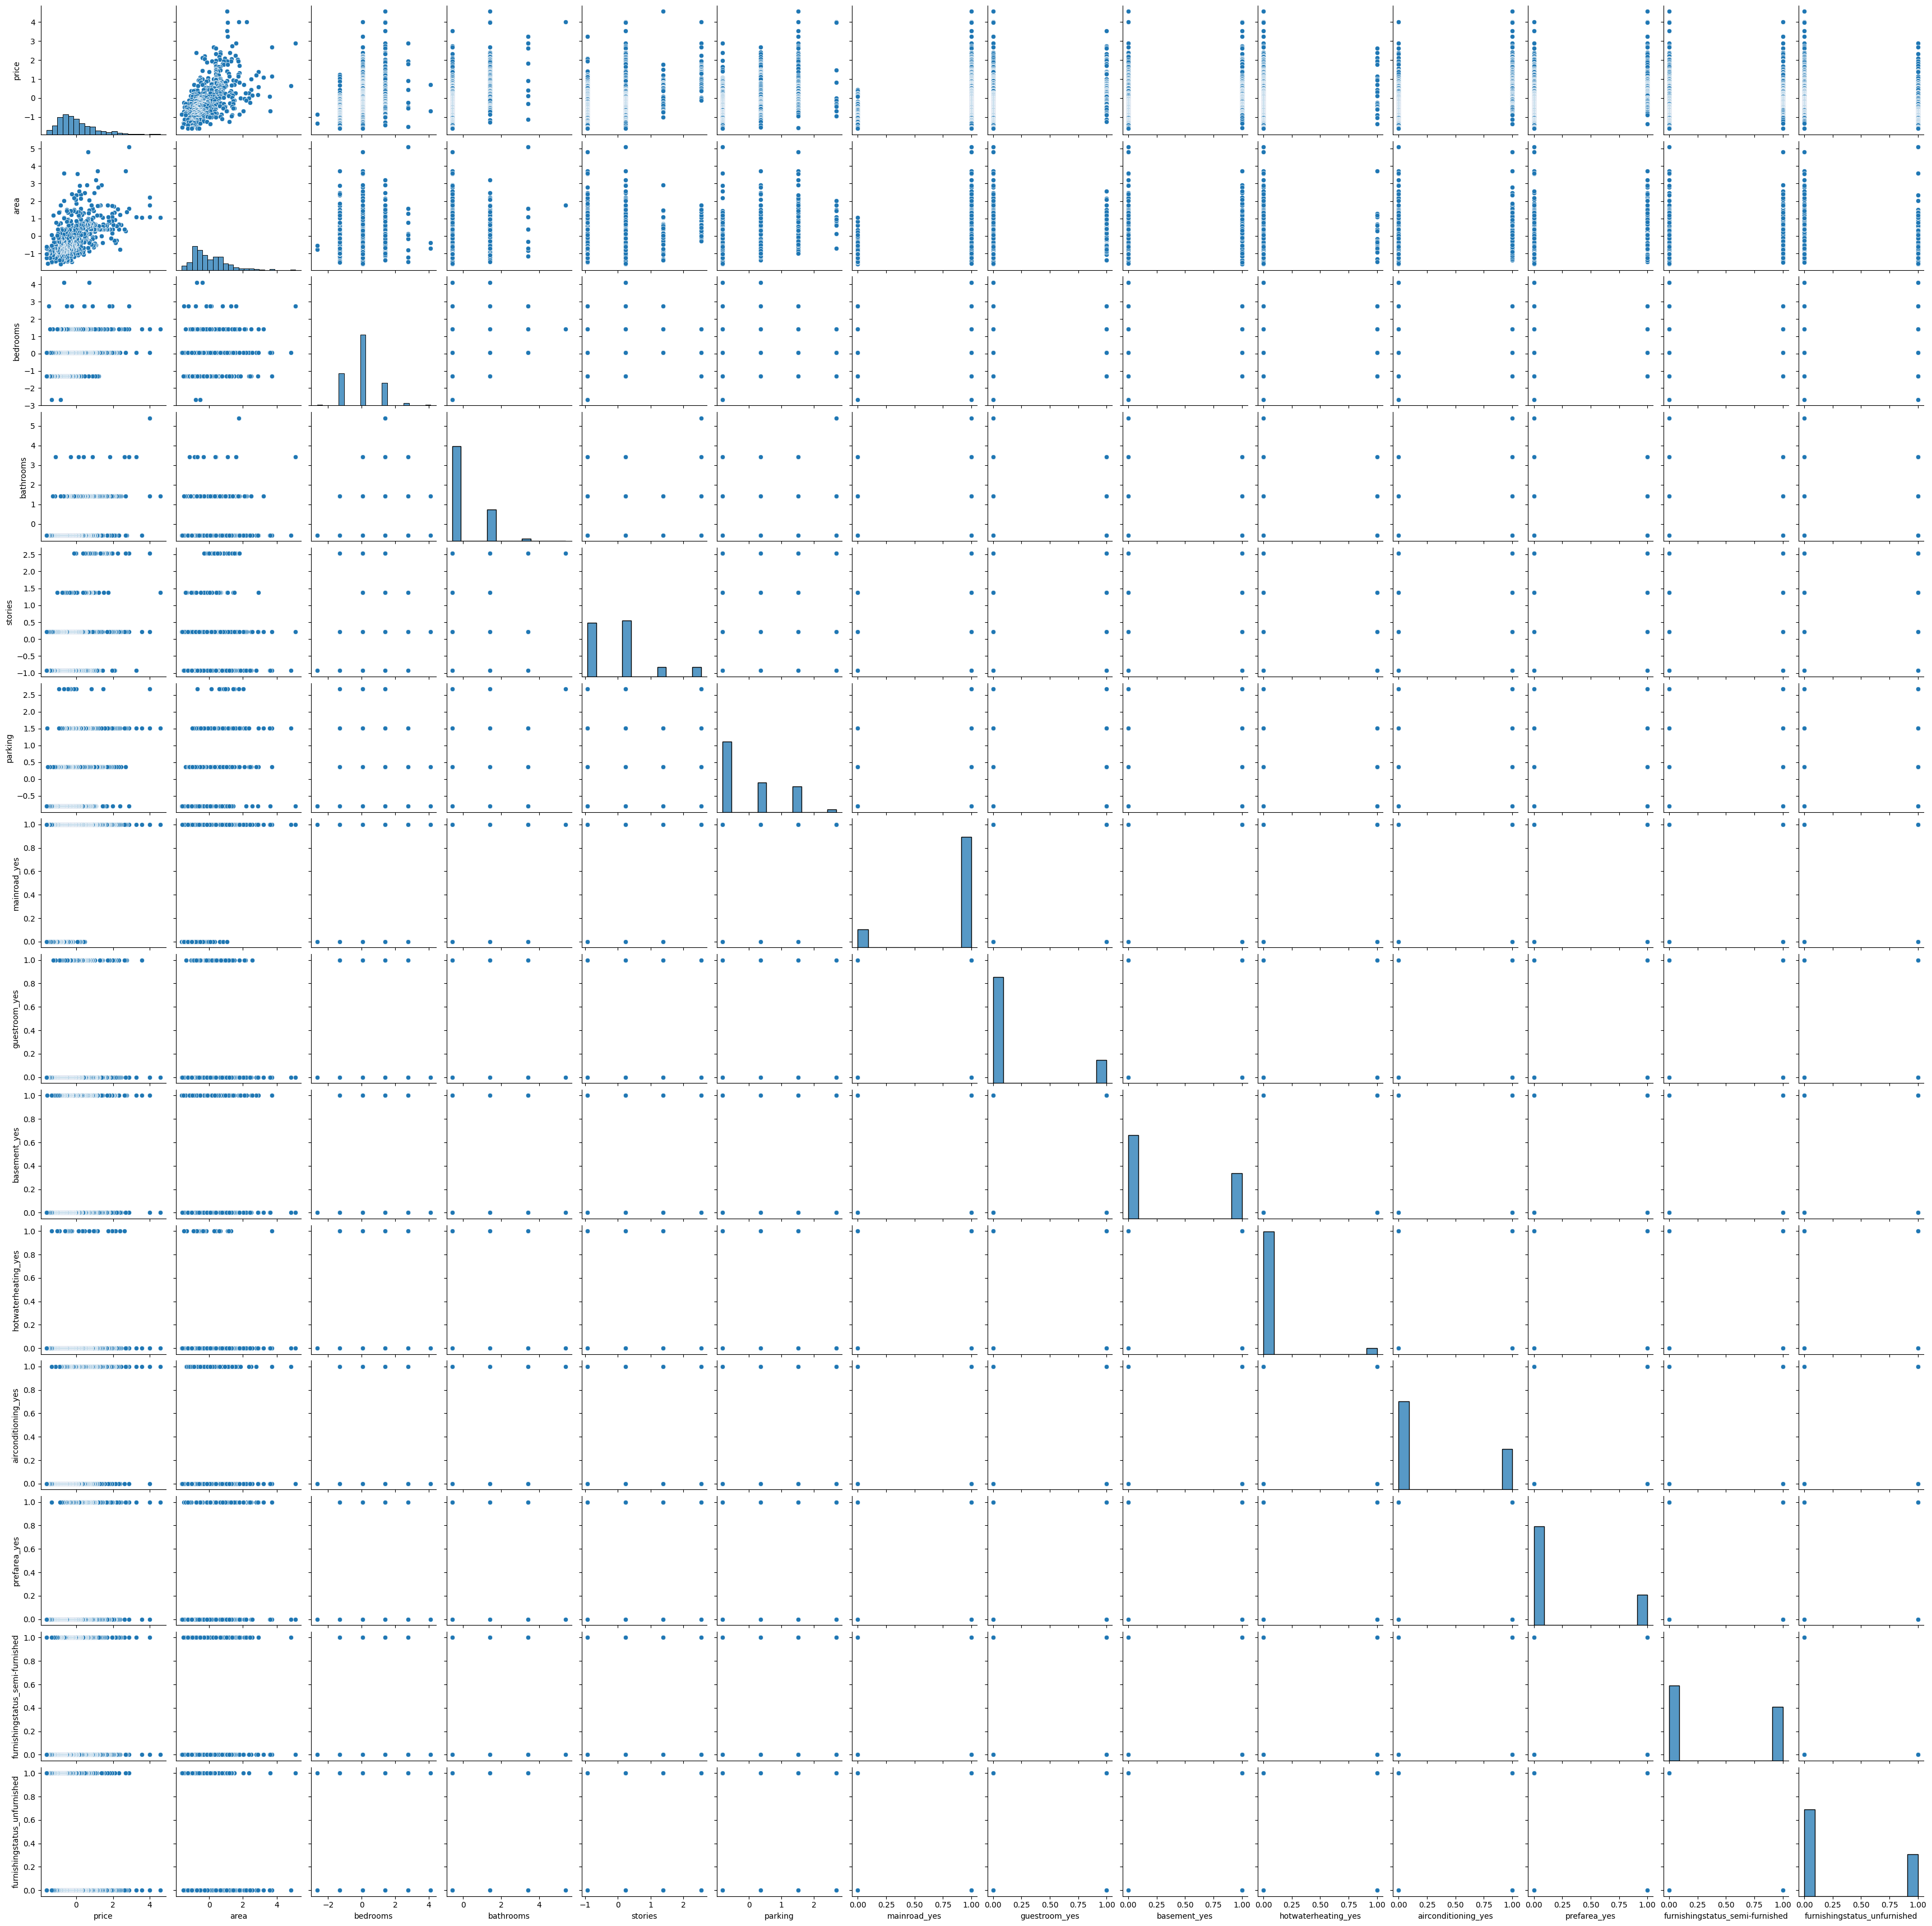

In [20]:
sns.pairplot(houses)

In [7]:
X = houses.drop("price", axis = 1)
y = houses["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((381, 13), (164, 13), (381,), (164,))

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Linear Regression model
lr_model = LinearRegression()

# Train the model on the training data
lr = lr_model.fit(X_train, y_train)

# Make predictions on the training and test data
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

lr.coef_

array([ 0.28661868,  0.0161177 ,  0.27431604,  0.24387601,  0.12578521,
        0.25178526,  0.14683978,  0.29306317,  0.43739877,  0.32879853,
        0.27336304, -0.03586833, -0.21195632])

In [169]:
mse_in = mean_squared_error(y_train, y_pred_train)
r2_in = r2_score(y_train, y_pred_train)

print("The In Sample MSE is", mse_in, "and the In Sample R2 is", r2_in)

# Evaluate the model performance
mse_out = mean_squared_error(y_test, y_pred_test)
r2_out = r2_score(y_test, y_pred_test)

print("The Out of Sample MSE is", mse_out, "and the Out of Sample R2 is",r2_out)

The In Sample MSE is 0.29601885631552055 and the In Sample R2 is 0.6812367200088845
The Out of Sample MSE is 0.3909089059875472 and the Out of Sample R2 is 0.6646298539852418
